In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [195]:
df=pd.read_csv(r"/content/email_data.csv")

In [196]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [197]:
df=df.drop('Unnamed: 0',axis=1)

In [198]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [199]:
y=df['label']
X=df[['text']]

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [201]:
X_train.head()

,text
4685,"Subject: buy cialis , phentermine , viagra lev..."
4129,Subject: final final version\ni have added she...
2788,Subject: re : valero ' s february gas nominati...
2892,Subject: lyondell - citgo\nsitara 147092 is ti...
326,"Subject: enron actuals for dec . 27 , 2000\nde..."


In [202]:
X_train.shape

(3878, 1)

#  Data Prepration - Text Preprocessing

In [203]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [204]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [205]:
stemmer=PorterStemmer()

In [206]:
lemmatizer=WordNetLemmatizer()

In [207]:
def preprocess(raw_text,flag):
  sentence=re.sub("[^a-zA-Z]"," ",raw_text)
  # change sentence to lower cas
  sentence=sentence.lower()
  # tokenize into words
  tokens=sentence.split()
  # remove stop words
  clean_word=[word for word in sentence if not word in stopwords.words("english")]

  if (flag=='stem'):
    clean_word=[stemmer.stem(word) for word in clean_word]
  else:
    clean_word=[lemmatizer.lemmatize(word) for word in clean_word]
  return pd.Series([" ".join(clean_word),len(clean_word)])

In [208]:
pip install tqdm

In [209]:
from tqdm import tqdm,tqdm_notebook

In [210]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

In [211]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
temp_df= X_train['text'].progress_apply(lambda x: preprocess(x,'stem'))
temp_df.head()

100%|██████████| 3878/3878 [07:43<00:00,  8.36it/s]


,0,1
4685,u b j e c b u c l p h e n e r n e ...,770
4129,u b j e c f n l f n l v e r n h v ...,47
2788,u b j e c r e v l e r f e b ...,1145
2892,u b j e c l n e l l c g r ...,247
326,u b j e c e n r n c u l f r e c ...,121


In [212]:
temp_df.head()

,0,1
4685,u b j e c b u c l p h e n e r n e ...,770
4129,u b j e c f n l f n l v e r n h v ...,47
2788,u b j e c r e v l e r f e b ...,1145
2892,u b j e c l n e l l c g r ...,247
326,u b j e c e n r n c u l f r e c ...,121


In [213]:
temp_df.columns=['clean_text_stem','length_text_stem']

In [214]:
temp_df.head()

,clean_text_stem,length_text_stem
4685,u b j e c b u c l p h e n e r n e ...,770
4129,u b j e c f n l f n l v e r n h v ...,47
2788,u b j e c r e v l e r f e b ...,1145
2892,u b j e c l n e l l c g r ...,247
326,u b j e c e n r n c u l f r e c ...,121


In [215]:
X_train=pd.concat([X_train,temp_df],axis=1)

In [216]:
X_train.head()

,text,clean_text_stem,length_text_stem
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121


In [217]:
temp_df=X_train['text'].progress_apply(lambda x:preprocess(x,'lemma'))
temp_df.head()

100%|██████████| 3878/3878 [07:53<00:00,  8.19it/s]


,0,1
4685,u b j e c b u c l p h e n e r n e ...,770
4129,u b j e c f n l f n l v e r n h v ...,47
2788,u b j e c r e v l e r f e b ...,1145
2892,u b j e c l n e l l c g r ...,247
326,u b j e c e n r n c u l f r e c ...,121


In [218]:
temp_df.columns=['clean_text_lemma','length_text_lemma']

In [219]:
temp_df.head()

,clean_text_lemma,length_text_lemma
4685,u b j e c b u c l p h e n e r n e ...,770
4129,u b j e c f n l f n l v e r n h v ...,47
2788,u b j e c r e v l e r f e b ...,1145
2892,u b j e c l n e l l c g r ...,247
326,u b j e c e n r n c u l f r e c ...,121


In [220]:
X_train=pd.concat([X_train,temp_df],axis=1)

In [221]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121


# Creating the WordCloud for Spam Emails

In [222]:
pip install wordcloud

In [223]:
from wordcloud import WordCloud

In [224]:
y_train

4685    spam
4129     ham
2788     ham
2892     ham
326      ham
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 3878, dtype: object

In [225]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770
3240,Subject: windows xp w / office xp for only $ 8...,u b j e c w n w x p w f f c e ...,239,u b j e c w n w x p w f f c e ...,239
4725,Subject: winning with small - cap daily tradin...,u b j e c w n n n g w h l l c p ...,2679,u b j e c w n n n g w h l l c p ...,2679
789,Subject: incr ' ease yo ' ur man ' hood by 4 -...,u b j e c n c r e e u r n ...,453,u b j e c n c r e e u r n ...,453
1745,Subject: re : start dating\ndaily update :\n4 ...,u b j e c r e r n g l u p e ...,467,u b j e c r e r n g l u p e ...,467


In [226]:
words=" ".join(spam_df['clean_text_lemma'])
print(words[:100])

u b j e c     b u   c l       p h e n e r n e       v g r   l e v r       v l u       x n x       r 


In [227]:
spam_df=X_train.loc[y_train=='spam',:]
words=' '.join(spam_df['clean_text_lemma'])
cleaned_word=" ".join([word for word in words.split() if 'subject' not in word])


In [228]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),background_color='black',width=1600,height=800).generate(cleaned_word)

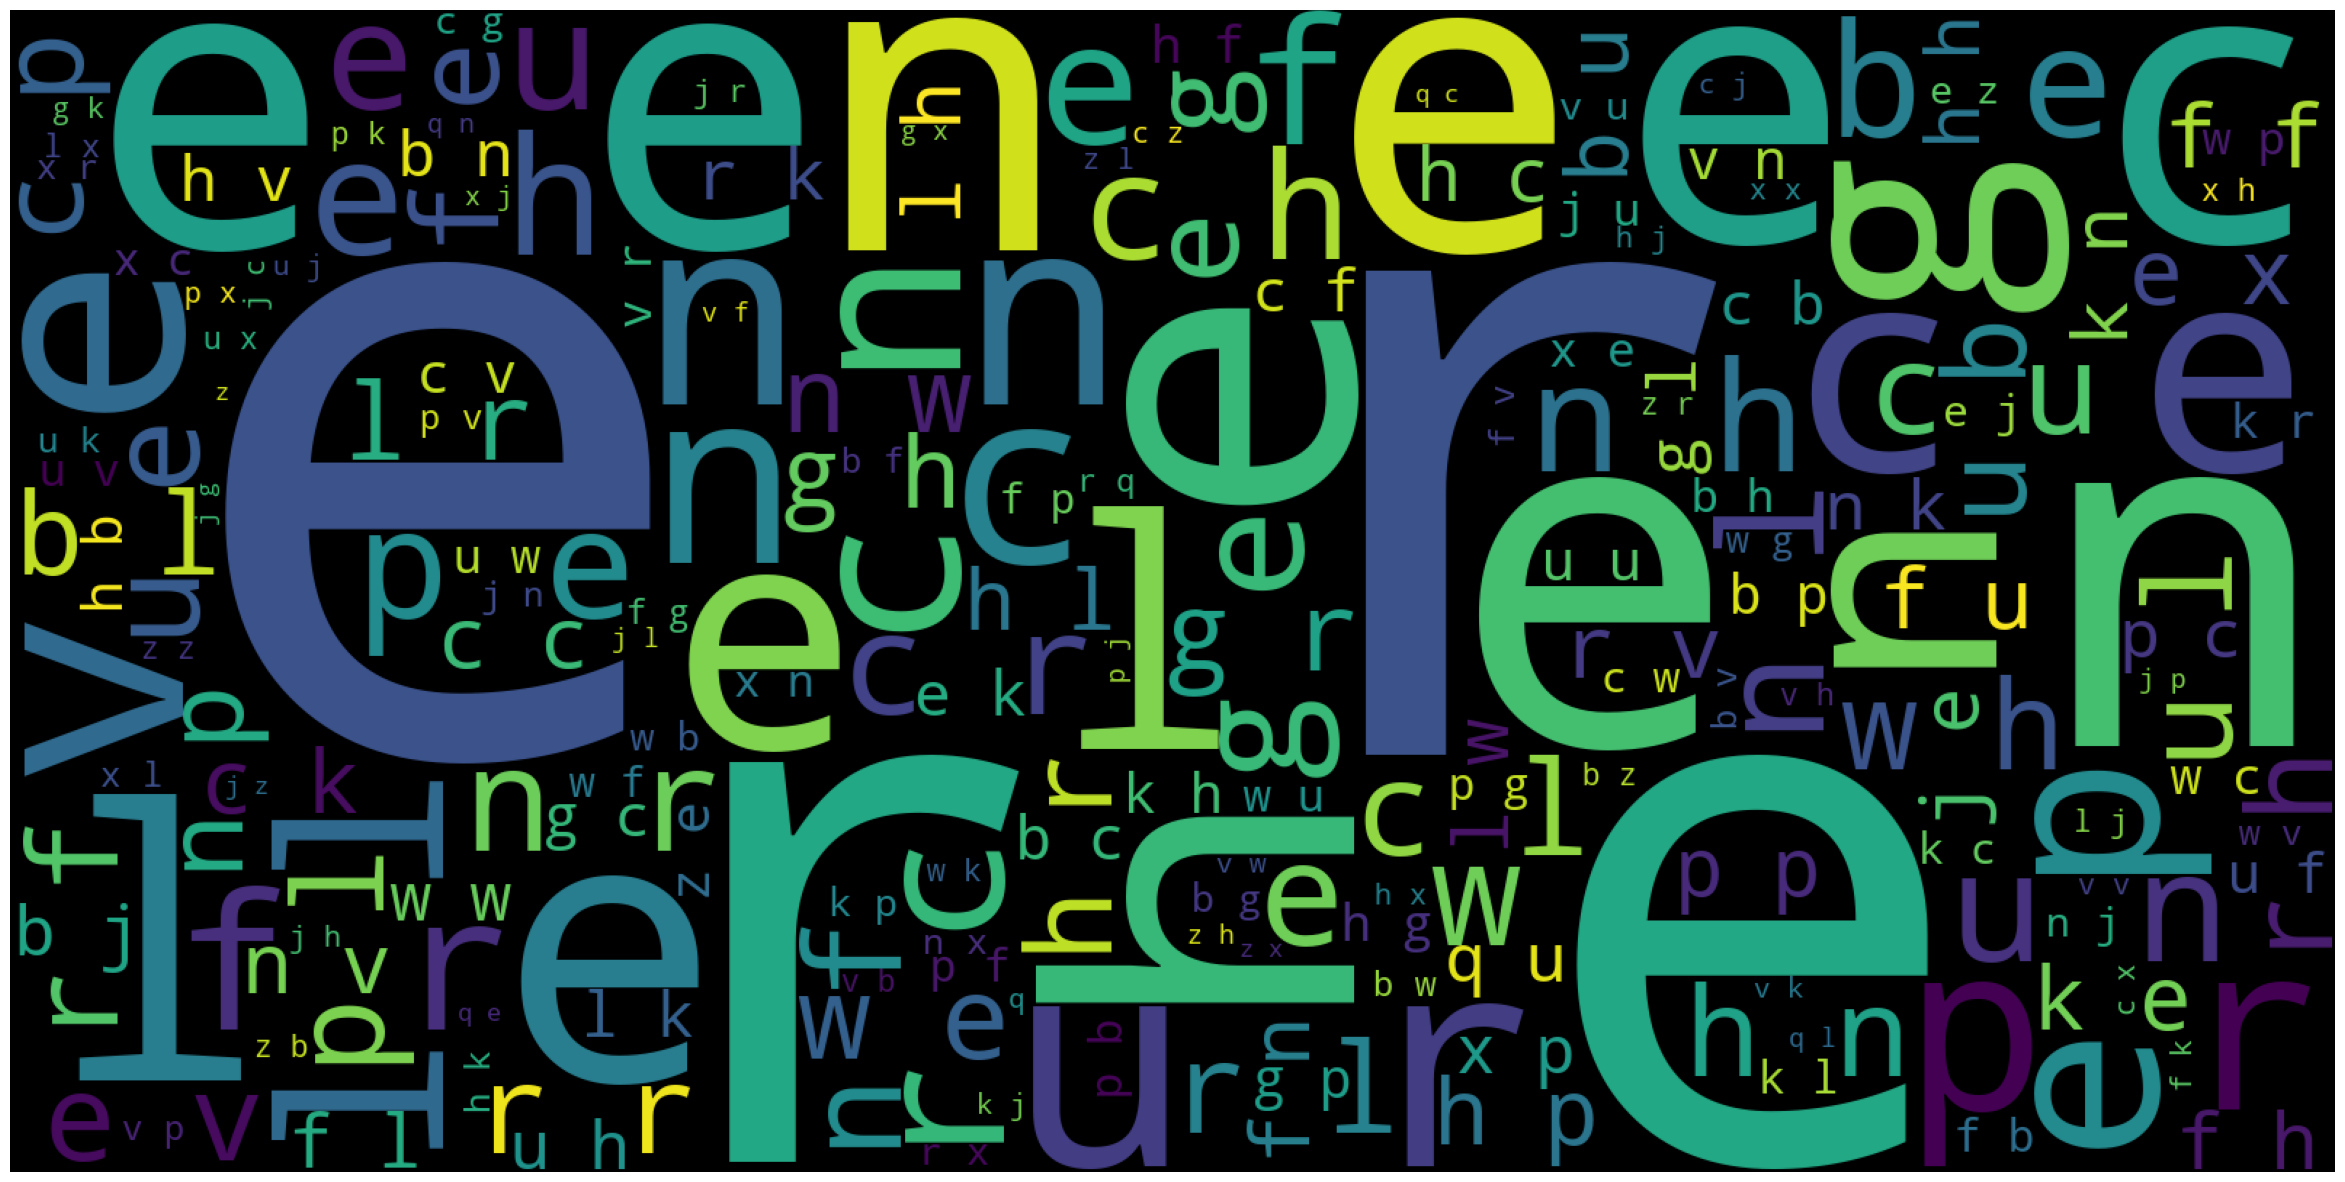

In [229]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

# Converting Text to Numerical vectors - Word2Vec Representation

   Step 1 - Import Word2Vec module from gensim.models

   Step 2 - Convert the sentences to the List of Words (i.e. List of Tokens)

   Step 3 - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.
   
   Step 4 - Convert the word vectors to document vectors.

In [230]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121


In [231]:
pip install gensim

In [232]:
import gensim
print(gensim.__version__)

4.3.2


In [233]:
from gensim.models import Word2Vec

In [234]:
X_train['tokenize_sentence']=X_train.clean_text_lemma.apply(lambda sent: sent.split())

In [235]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ..."


In [236]:
# train model
model=Word2Vec(list(X_train.tokenize_sentence),vector_size=300,min_count=1)

In [237]:
print(model)

Word2Vec<vocab=18, vector_size=300, alpha=0.025>


In [238]:
# Checking the shape of vectors learned by the model
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(18, 300)


In [239]:
def document_vectors(doc,keyed_vectors):
  """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
  vocab_token=[word for word in doc if word in keyed_vectors.index_to_key]
  return np.mean(keyed_vectors.__getitem__(vocab_token),axis=0)

In [240]:
X_train['doc_vector']=X_train['clean_text_lemma'].progress_apply(lambda x:document_vectors(x,model.wv))

100%|██████████| 3878/3878 [00:07<00:00, 529.17it/s]


In [241]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125..."


In [242]:
X_train_w2v=list(X_train['doc_vector'])

# Preprocessing the Test Data

In [243]:
X_test.head()

,text
1566,"Subject: hpl nom for march 30 , 2001\n( see at..."
1988,Subject: online pharxmacy 80 % off all meds\nd...
1235,Subject: re : nom / actual volume for april 17...
2868,Subject: re : meter 8740 dec 99\nrobert and i ...
4903,Subject: re : coastal oil & gas corporation\nm...


In [244]:
temp_df=X_test['text'].progress_apply(lambda x:preprocess(x,'lemma'))
temp_df.head()

100%|██████████| 1293/1293 [02:59<00:00,  7.19it/s]


,0,1
1566,u b j e c h p l n f r r c h ...,76
1988,u b j e c n l n e p h r x c ...,13659
1235,u b j e c r e n c u l v l u ...,301
2868,u b j e c r e e e r e c ...,2491
4903,u b j e c r e c l l g c r ...,9650


In [245]:
temp_df.columns=['clean_text_lemma','length_text_lemma']

In [246]:
X_test=pd.concat([X_test,temp_df],axis=1)
X_test.head()

,text,clean_text_lemma,length_text_lemma
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650


In [247]:
X_test['tokenize_sentence']=X_test['clean_text_lemma'].apply(lambda x:x.split())
X_test.head()

,text,clean_text_lemma,length_text_lemma,tokenize_sentence
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76,"[u, b, j, e, c, h, p, l, n, f, r, r, c, h, e, ..."
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659,"[u, b, j, e, c, n, l, n, e, p, h, r, x, c, f, ..."
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301,"[u, b, j, e, c, r, e, n, c, u, l, v, l, u, e, ..."
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491,"[u, b, j, e, c, r, e, e, e, r, e, c, r, b, e, ..."
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650,"[u, b, j, e, c, r, e, c, l, l, g, c, r, p, r, ..."


In [248]:
X_test['doc_vector']=X_test['clean_text_lemma'].progress_apply(lambda x:document_vectors(x,model.wv))
X_test.head()

100%|██████████| 1293/1293 [00:02<00:00, 554.63it/s]


,text,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76,"[u, b, j, e, c, h, p, l, n, f, r, r, c, h, e, ...","[-0.11930035, 0.03216807, -0.06781151, 0.05587..."
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659,"[u, b, j, e, c, n, l, n, e, p, h, r, x, c, f, ...","[-0.11286084, -0.008560398, -0.0829635, 0.0116..."
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301,"[u, b, j, e, c, r, e, n, c, u, l, v, l, u, e, ...","[-0.11143022, -0.006626961, -0.064072065, 0.04..."
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491,"[u, b, j, e, c, r, e, e, e, r, e, c, r, b, e, ...","[-0.13505954, -0.02351682, -0.09029637, 0.0143..."
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650,"[u, b, j, e, c, r, e, c, l, l, g, c, r, p, r, ...","[-0.12477478, -0.011133685, -0.08714163, 0.006..."


In [249]:
X_test_w2v=list(X_test.doc_vector)

# Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train_w2v,y_train)

LogisticRegression()

In [251]:
y_test_predict=classifier.predict(X_test_w2v)

In [252]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.7293116782675947
              precision    recall  f1-score   support

         ham       0.97      0.74      0.84      1232
        spam       0.10      0.61      0.17        61

    accuracy                           0.73      1293
   macro avg       0.54      0.67      0.51      1293
weighted avg       0.93      0.73      0.81      1293



# Decision Tree

In [253]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_w2v,y_train)

DecisionTreeClassifier()

In [254]:
y_test_predict=classifier.predict(X_test_w2v)

In [255]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))


0.7525135344160866
              precision    recall  f1-score   support

         ham       0.82      0.83      0.83       912
        spam       0.58      0.56      0.57       381

    accuracy                           0.75      1293
   macro avg       0.70      0.70      0.70      1293
weighted avg       0.75      0.75      0.75      1293



# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_w2v,y_train)

RandomForestClassifier()

In [257]:
y_test_predict=classifier.predict(X_test_w2v)

In [258]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.8329466357308585
              precision    recall  f1-score   support

         ham       0.94      0.84      0.89      1042
        spam       0.55      0.79      0.65       251

    accuracy                           0.83      1293
   macro avg       0.75      0.82      0.77      1293
weighted avg       0.87      0.83      0.84      1293



# Pretrained GloVe for Sentence Vector

In [259]:
import gensim
import gensim.downloader as api
print(gensim.__version__)
print(list(gensim.downloader.info()['models'].keys()))

4.3.2
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [260]:
wv=api.load("glove-twitter-50")
# # Approax 200MB Size
# # Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

In [261]:
len(wv.index_to_key)

1193514

In [262]:
X_train['doc_vector_pretrained_glove']=X_train.tokenize_sentence.progress_apply(lambda x: document_vectors(x,wv))
X_train.head()

100%|██████████| 3878/3878 [00:07<00:00, 499.18it/s]


,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974..."


In [263]:
X_train_pretrained_glove=list(X_train.doc_vector_pretrained_glove)

In [264]:
X_test.head()

,text,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76,"[u, b, j, e, c, h, p, l, n, f, r, r, c, h, e, ...","[-0.11930035, 0.03216807, -0.06781151, 0.05587..."
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659,"[u, b, j, e, c, n, l, n, e, p, h, r, x, c, f, ...","[-0.11286084, -0.008560398, -0.0829635, 0.0116..."
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301,"[u, b, j, e, c, r, e, n, c, u, l, v, l, u, e, ...","[-0.11143022, -0.006626961, -0.064072065, 0.04..."
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491,"[u, b, j, e, c, r, e, e, e, r, e, c, r, b, e, ...","[-0.13505954, -0.02351682, -0.09029637, 0.0143..."
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650,"[u, b, j, e, c, r, e, c, l, l, g, c, r, p, r, ...","[-0.12477478, -0.011133685, -0.08714163, 0.006..."


In [265]:
X_test['doc_vector_pretrained_glove']=X_test.tokenize_sentence.progress_apply(lambda x:document_vectors(x,wv))
X_test.head()

100%|██████████| 1293/1293 [00:03<00:00, 340.97it/s]


,text,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76,"[u, b, j, e, c, h, p, l, n, f, r, r, c, h, e, ...","[-0.11930035, 0.03216807, -0.06781151, 0.05587...","[0.33514935, -0.16125058, 0.17853267, -0.31480..."
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659,"[u, b, j, e, c, n, l, n, e, p, h, r, x, c, f, ...","[-0.11286084, -0.008560398, -0.0829635, 0.0116...","[0.33111313, -0.07562498, 0.33213788, -0.30848..."
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301,"[u, b, j, e, c, r, e, n, c, u, l, v, l, u, e, ...","[-0.11143022, -0.006626961, -0.064072065, 0.04...","[0.3043245, -0.057858337, 0.26882833, -0.25279..."
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491,"[u, b, j, e, c, r, e, e, e, r, e, c, r, b, e, ...","[-0.13505954, -0.02351682, -0.09029637, 0.0143...","[0.35221076, -0.092467435, 0.35489446, -0.3058..."
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650,"[u, b, j, e, c, r, e, c, l, l, g, c, r, p, r, ...","[-0.12477478, -0.011133685, -0.08714163, 0.006...","[0.32764494, -0.09712293, 0.2914222, -0.282938..."


In [266]:
X_test_pretrained_glove=list(X_test.doc_vector_pretrained_glove)

# Logistic Regression

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
classifier= LogisticRegression()
classifier.fit(X_train_pretrained_glove,y_train)
y_test_predict=classifier.predict(X_test_pretrained_glove)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7563805104408353
              precision    recall  f1-score   support

         ham       0.93      0.78      0.85      1113
        spam       0.31      0.63      0.42       180

    accuracy                           0.76      1293
   macro avg       0.62      0.70      0.63      1293
weighted avg       0.84      0.76      0.79      1293



# Decision Tree

In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
classifier=DecisionTreeClassifier()
classifier.fit(X_train_pretrained_glove,y_train)
y_test_predict=classifier.predict(X_test_pretrained_glove)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.768754833720031
              precision    recall  f1-score   support

         ham       0.83      0.85      0.84       913
        spam       0.61      0.58      0.60       380

    accuracy                           0.77      1293
   macro avg       0.72      0.71      0.72      1293
weighted avg       0.77      0.77      0.77      1293



# Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
classifier=RandomForestClassifier()
classifier.fit(X_train_pretrained_glove,y_train)
y_test_predict=classifier.predict(X_test_pretrained_glove)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.8244392884764115
              precision    recall  f1-score   support

         ham       0.93      0.84      0.88      1025
        spam       0.56      0.75      0.64       268

    accuracy                           0.82      1293
   macro avg       0.74      0.80      0.76      1293
weighted avg       0.85      0.82      0.83      1293



In [270]:
X_train.doc_vector.values[1].shape

(300,)

In [271]:
X_train.doc_vector_pretrained_glove.values[1].shape

(50,)

# Pretrained BERT for Sentence Vectors

In [272]:
! pip install -U sentence-transformers

In [273]:
from sentence_transformers import SentenceTransformer, util

In [274]:
model=SentenceTransformer('all-MiniLM-L6-v2')

In [275]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974..."


In [276]:
X_train['doc_vector_pretrained_bert']=X_train.clean_text_lemma.progress_apply(model.encode)

100%|██████████| 3878/3878 [07:58<00:00,  8.10it/s]


In [277]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048...","[0.017040491, -0.024073875, 0.045404963, 0.028..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738...","[0.04218988, 0.020757986, 0.07273296, -0.01892..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095...","[0.0074195927, -0.017091913, 0.035609353, 0.01..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854...","[-0.013401081, -0.021811338, 0.01899999, 0.034..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974...","[0.036280617, -0.02227549, 0.030856341, 0.0401..."


In [278]:
X_train_pretrain_bert= list(X_train.doc_vector_pretrained_bert)

In [280]:
X_test['doc_vector_pretrained_bert']=X_test['clean_text_lemma'].progress_apply(model.encode)
X_test.head()

100%|██████████| 1293/1293 [03:53<00:00,  5.53it/s]


,text,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",u b j e c h p l n f r r c h ...,76,"[u, b, j, e, c, h, p, l, n, f, r, r, c, h, e, ...","[-0.11930035, 0.03216807, -0.06781151, 0.05587...","[0.33514935, -0.16125058, 0.17853267, -0.31480...","[0.028267108, -0.014146116, 0.063080184, -0.00..."
1988,Subject: online pharxmacy 80 % off all meds\nd...,u b j e c n l n e p h r x c ...,13659,"[u, b, j, e, c, n, l, n, e, p, h, r, x, c, f, ...","[-0.11286084, -0.008560398, -0.0829635, 0.0116...","[0.33111313, -0.07562498, 0.33213788, -0.30848...","[-0.012096349, -0.026899576, 0.03298944, 0.035..."
1235,Subject: re : nom / actual volume for april 17...,u b j e c r e n c u l v l u ...,301,"[u, b, j, e, c, r, e, n, c, u, l, v, l, u, e, ...","[-0.11143022, -0.006626961, -0.064072065, 0.04...","[0.3043245, -0.057858337, 0.26882833, -0.25279...","[0.03059589, -0.012402726, 0.048537392, 0.0196..."
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,u b j e c r e e e r e c ...,2491,"[u, b, j, e, c, r, e, e, e, r, e, c, r, b, e, ...","[-0.13505954, -0.02351682, -0.09029637, 0.0143...","[0.35221076, -0.092467435, 0.35489446, -0.3058...","[0.0059682354, -0.008561084, 0.049026087, 0.03..."
4903,Subject: re : coastal oil & gas corporation\nm...,u b j e c r e c l l g c r ...,9650,"[u, b, j, e, c, r, e, c, l, l, g, c, r, p, r, ...","[-0.12477478, -0.011133685, -0.08714163, 0.006...","[0.32764494, -0.09712293, 0.2914222, -0.282938...","[-0.0075227176, -0.023732852, 0.031514075, 0.0..."


In [281]:
X_test_pretrained_bert=list(X_test['doc_vector_pretrained_bert'])

# Logistic Regression

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
classifier=LogisticRegression()
classifier.fit(X_train_pretrain_bert,y_train)
y_test_predict= classifier.predict(X_test_pretrained_bert)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.7602474864655839
              precision    recall  f1-score   support

         ham       0.96      0.77      0.85      1162
        spam       0.25      0.70      0.37       131

    accuracy                           0.76      1293
   macro avg       0.61      0.73      0.61      1293
weighted avg       0.89      0.76      0.80      1293



# DecisionTree

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
classifier=DecisionTreeClassifier()
classifier.fit(X_train_pretrain_bert,y_train)
y_test_predict= classifier.predict(X_test_pretrained_bert)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.7641144624903325
              precision    recall  f1-score   support

         ham       0.83      0.84      0.83       915
        spam       0.60      0.58      0.59       378

    accuracy                           0.76      1293
   macro avg       0.71      0.71      0.71      1293
weighted avg       0.76      0.76      0.76      1293



# RandomForest

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
classifier= RandomForestClassifier()
classifier.fit(X_train_pretrain_bert,y_train)
y_test_predict= classifier.predict(X_test_pretrained_bert)
print(accuracy_score(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

0.8190255220417634
              precision    recall  f1-score   support

         ham       0.94      0.83      0.88      1054
        spam       0.51      0.77      0.61       239

    accuracy                           0.82      1293
   macro avg       0.72      0.80      0.75      1293
weighted avg       0.86      0.82      0.83      1293



In [287]:
X_train.doc_vector_pretrained_bert.values[1].shape

(384,)

# Visualization for W2V Embeddings

In [289]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048...","[0.017040491, -0.024073875, 0.045404963, 0.028..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738...","[0.04218988, 0.020757986, 0.07273296, -0.01892..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095...","[0.0074195927, -0.017091913, 0.035609353, 0.01..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854...","[-0.013401081, -0.021811338, 0.01899999, 0.034..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974...","[0.036280617, -0.02227549, 0.030856341, 0.0401..."


In [288]:
X_train.columns

Index(['text', 'clean_text_stem', 'length_text_stem', 'clean_text_lemma',
       'length_text_lemma', 'tokenize_sentence', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [291]:
w2v_embeddings= np.array(X_train['doc_vector'].tolist())

In [293]:
w2v_embeddings.shape

(3878, 300)

In [295]:
labels=y_train.apply(lambda x:1 if x=='ham' else 0)
len(labels)

3878

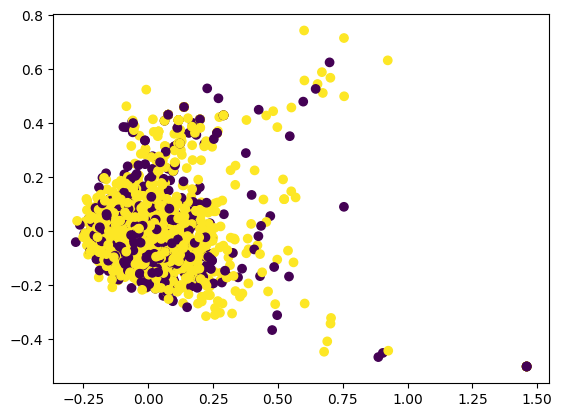

In [314]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
pca=PCA(n_components=2)
pca_data= pca.fit_transform(w2v_embeddings)

pca_df= pd.DataFrame(data=pca_data,columns=('Dim_1',"Dim_2"))
pca_df['labels']=labels

plt.scatter(pca_df["Dim_1"],pca_df["Dim_2"],c=pca_df['labels'])
plt.show()




1. klearn.manifold.TSNE is a tool to visualize high-dimensional data by reducing its dimensionality down to 2 or 3 dimensions. It is particularly useful for visualizing clusters or patterns in data.
2.If you're referring to obtaining the mean of the t-SNE coordinates after applying t-SNE dimensionality reduction, it's not a standard procedure because t-SNE generates a new low-dimensional representation of the data, where each point represents a transformed version of the original data point.

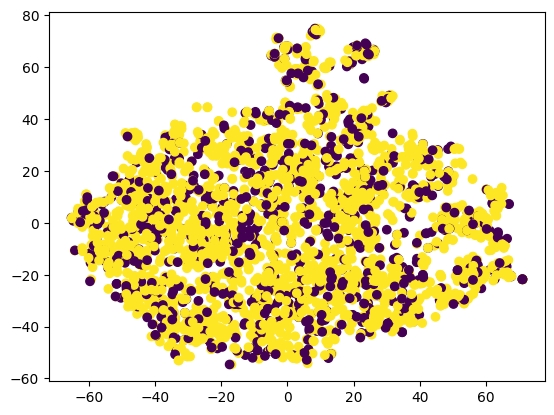

In [302]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0,n_iter=1000)
tsne_data=tsne.fit_transform(w2v_embeddings)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2"))
tsne_df["labels"]=labels
plt.scatter(tsne_df["Dim_1"],tsne_df["Dim_2"],c=tsne_df['labels'])
plt.show()


# Visualization for Pretrained GloVe Embeddings

In [303]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048...","[0.017040491, -0.024073875, 0.045404963, 0.028..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738...","[0.04218988, 0.020757986, 0.07273296, -0.01892..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095...","[0.0074195927, -0.017091913, 0.035609353, 0.01..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854...","[-0.013401081, -0.021811338, 0.01899999, 0.034..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974...","[0.036280617, -0.02227549, 0.030856341, 0.0401..."


In [305]:
pretrained_glove_embedding=np.array(X_train['doc_vector_pretrained_glove'].to_list())
pretrained_glove_embedding.shape

(3878, 50)

In [306]:
labels=y_train.apply(lambda x:1 if x=='ham' else 0)

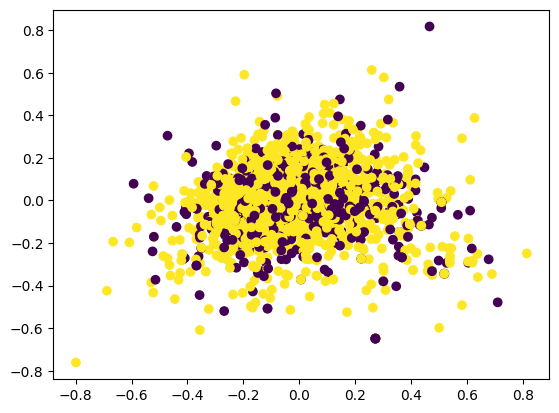

In [315]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(pretrained_glove_embedding)
pca_df=pd.DataFrame(data=pca_data,columns=("Dim_1","Dim_2"))
pca_df["labels"]=labels

plt.scatter(pca_df['Dim_1'],pca_df["Dim_2"],c=pca_df['labels'])
plt.show()

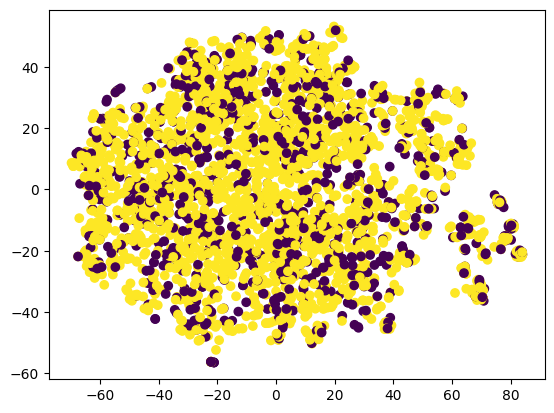

In [318]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0,n_iter=1000)
tsne_data=tsne.fit_transform(pretrained_glove_embedding)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2"))
tsne_df['labels']=labels
plt.scatter(tsne_df["Dim_1"],tsne_df["Dim_2"],c=tsne_df['labels'])
plt.show()

# Visualization for Pretrained BERT Embeddings

In [319]:
X_train.head()

,text,clean_text_stem,length_text_stem,clean_text_lemma,length_text_lemma,tokenize_sentence,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
4685,"Subject: buy cialis , phentermine , viagra lev...",u b j e c b u c l p h e n e r n e ...,770,u b j e c b u c l p h e n e r n e ...,770,"[u, b, j, e, c, b, u, c, l, p, h, e, n, e, r, ...","[-0.116106555, -0.012691182, -0.089418046, 0.0...","[0.33243635, -0.058852408, 0.30513483, -0.3048...","[0.017040491, -0.024073875, 0.045404963, 0.028..."
4129,Subject: final final version\ni have added she...,u b j e c f n l f n l v e r n h v ...,47,u b j e c f n l f n l v e r n h v ...,47,"[u, b, j, e, c, f, n, l, f, n, l, v, e, r, n, ...","[-0.12376259, -0.03961636, -0.08359098, 0.0336...","[0.37987903, -0.20749849, 0.2787614, -0.301738...","[0.04218988, 0.020757986, 0.07273296, -0.01892..."
2788,Subject: re : valero ' s february gas nominati...,u b j e c r e v l e r f e b ...,1145,u b j e c r e v l e r f e b ...,1145,"[u, b, j, e, c, r, e, v, l, e, r, f, e, b, r, ...","[-0.11469515, -0.018387815, -0.08954629, 0.007...","[0.34489936, -0.12657526, 0.31448546, -0.31095...","[0.0074195927, -0.017091913, 0.035609353, 0.01..."
2892,Subject: lyondell - citgo\nsitara 147092 is ti...,u b j e c l n e l l c g r ...,247,u b j e c l n e l l c g r ...,247,"[u, b, j, e, c, l, n, e, l, l, c, g, r, e, r, ...","[-0.12430862, -0.03305424, -0.08507354, 0.0003...","[0.3100257, -0.057099033, 0.30030242, -0.29854...","[-0.013401081, -0.021811338, 0.01899999, 0.034..."
326,"Subject: enron actuals for dec . 27 , 2000\nde...",u b j e c e n r n c u l f r e c ...,121,u b j e c e n r n c u l f r e c ...,121,"[u, b, j, e, c, e, n, r, n, c, u, l, f, r, e, ...","[-0.12071379, 0.03395964, -0.078240186, 0.0125...","[0.3765429, -0.20504694, 0.26401156, -0.280974...","[0.036280617, -0.02227549, 0.030856341, 0.0401..."


In [320]:
pretrain_bert_embedding=np.array(X_train['doc_vector_pretrained_bert'].to_list())

In [321]:
pretrain_bert_embedding.shape

(3878, 384)

In [322]:
labels=y_train.apply(lambda x: 1 if x=='ham' else 0)


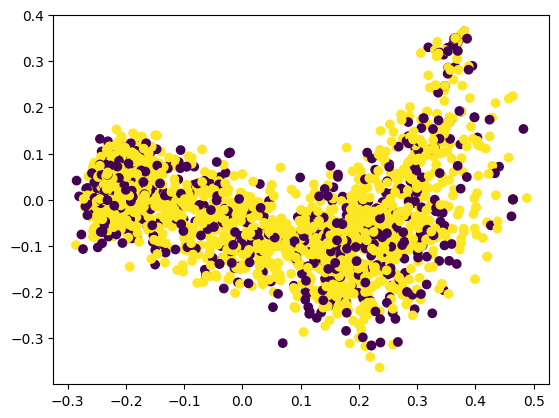

In [325]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data= pca.fit_transform(pretrain_bert_embedding)
pca_df=pd.DataFrame(data=pca_data,columns=("Dim_1","Dim_2"))
pca_df['labels']=labels
plt.scatter(pca_df['Dim_1'],pca_df["Dim_2"],c=pca_df["labels"])
plt.show()

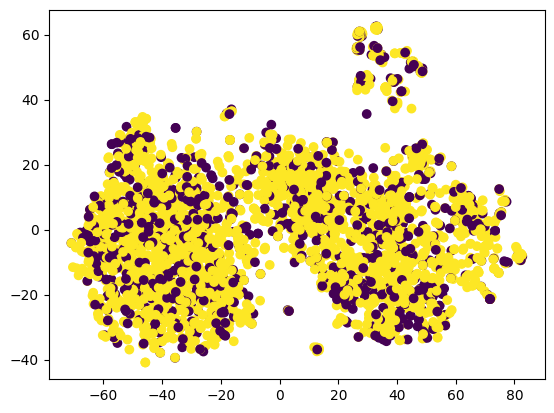

In [326]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0,n_iter=1000)
tsne_data=tsne.fit_transform(pretrain_bert_embedding)
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2"))
tsne_df["labels"]=labels
plt.scatter(tsne_df["Dim_1"],tsne_df["Dim_2"],c=tsne_df["labels"])
plt.show()